# Imports

In [41]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.io import imsave
from skimage.transform import resize
import seaborn as sns
from utils import *
from statsmodels.formula.api import logit

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


## Dataframe


In [2]:
df = pd.read_csv("processed_data/chexpert_plus_240401_cleaned.csv")


df_labeled = pd.read_csv("final_data/chexpert_plus_240401_cleaned_label.csv")
df_bis = pd.read_csv("processed_data/chexpert_plus_240401_cleaned_sex.csv")
df_cleaned_health_insurance = pd.read_csv("processed_data/chexpert_plus_240401_cleaned_health_insurance.csv")
df_cleaned_race = pd.read_csv("processed_data/chexpert_plus_240401_cleaned_race.csv")
df_cleaned_sex_label = pd.read_csv("final_data/chexpert_plus_240401_cleaned_label_sex.csv")
df_cleaned_health_insurance_label = pd.read_csv("final_data/chexpert_plus_240401_cleaned_label_health.csv")
df_cleaned_race_label = pd.read_csv("final_data/chexpert_plus_240401_cleaned_label_race.csv")

In [3]:
print('Total number of acquisitions:', len(df))
print('Total number of patients:', len(df['deid_patient_id'].unique()))
print('Train/Valid:', df.split.value_counts())

Total number of acquisitions: 112105
Total number of patients: 39417
Train/Valid: split
train    111984
valid       121
Name: count, dtype: int64


In [4]:
print('Total number of acquisitions:', len(df_bis))
print('Total number of patients:', len(df_bis['deid_patient_id'].unique()))
print('Train/Valid:', df_bis.split.value_counts())


Total number of acquisitions: 190853
Total number of patients: 64612
Train/Valid: split
train    190653
valid       200
Name: count, dtype: int64


In [5]:
print('Total number of acquisitions:', len(df_cleaned_health_insurance))
print('Total number of patients:', len(df_cleaned_health_insurance['deid_patient_id'].unique()))
print('Train/Valid:', df_cleaned_health_insurance.split.value_counts())

Total number of acquisitions: 150456
Total number of patients: 53128
Train/Valid: split
train    150292
valid       164
Name: count, dtype: int64


In [6]:
print('Total number of acquisitions:', len(df_cleaned_race))
print('Total number of patients:', len(df_cleaned_race['deid_patient_id'].unique()))
print('Train/Valid:', df_cleaned_race.split.value_counts())

Total number of acquisitions: 138658
Total number of patients: 46800
Train/Valid: split
train    138511
valid       147
Name: count, dtype: int64


## Image examples

In [7]:
# img_f = imread("/data4/CheXpert/CheXpert-v1.0/train/patient04528/study1/view1_frontal.jpg")
# img_l = imread("/data4/CheXpert/CheXpert-v1.0/train/patient04528/study1/view2_lateral.jpg")

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(img_f, cmap='gray')
# ax[0].axis('off')
# ax[0].set_title(f'Frontal \n {img_f.shape[0]}x{img_f.shape[1]}')
# ax[1].imshow(img_l, cmap='gray')
# ax[1].axis('off')
# ax[1].set_title(f'Lateral \n {img_l.shape[0]}x{img_l.shape[1]}')

In [8]:
# # Resized
# img_f_resized = resize(img_f, (224, 224), preserve_range=True)
# img_l_resized = resize(img_l, (224, 224), preserve_range=True)

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(img_f_resized, cmap='gray')
# ax[0].axis('off')
# ax[0].set_title(f'Frontal \n {img_f_resized.shape[0]}x{img_f_resized.shape[1]}')
# ax[1].imshow(img_l_resized, cmap='gray')
# ax[1].axis('off')
# ax[1].set_title(f'Lateral \n {img_l_resized.shape[0]}x{img_l_resized.shape[1]}')


## Tabular Exploration

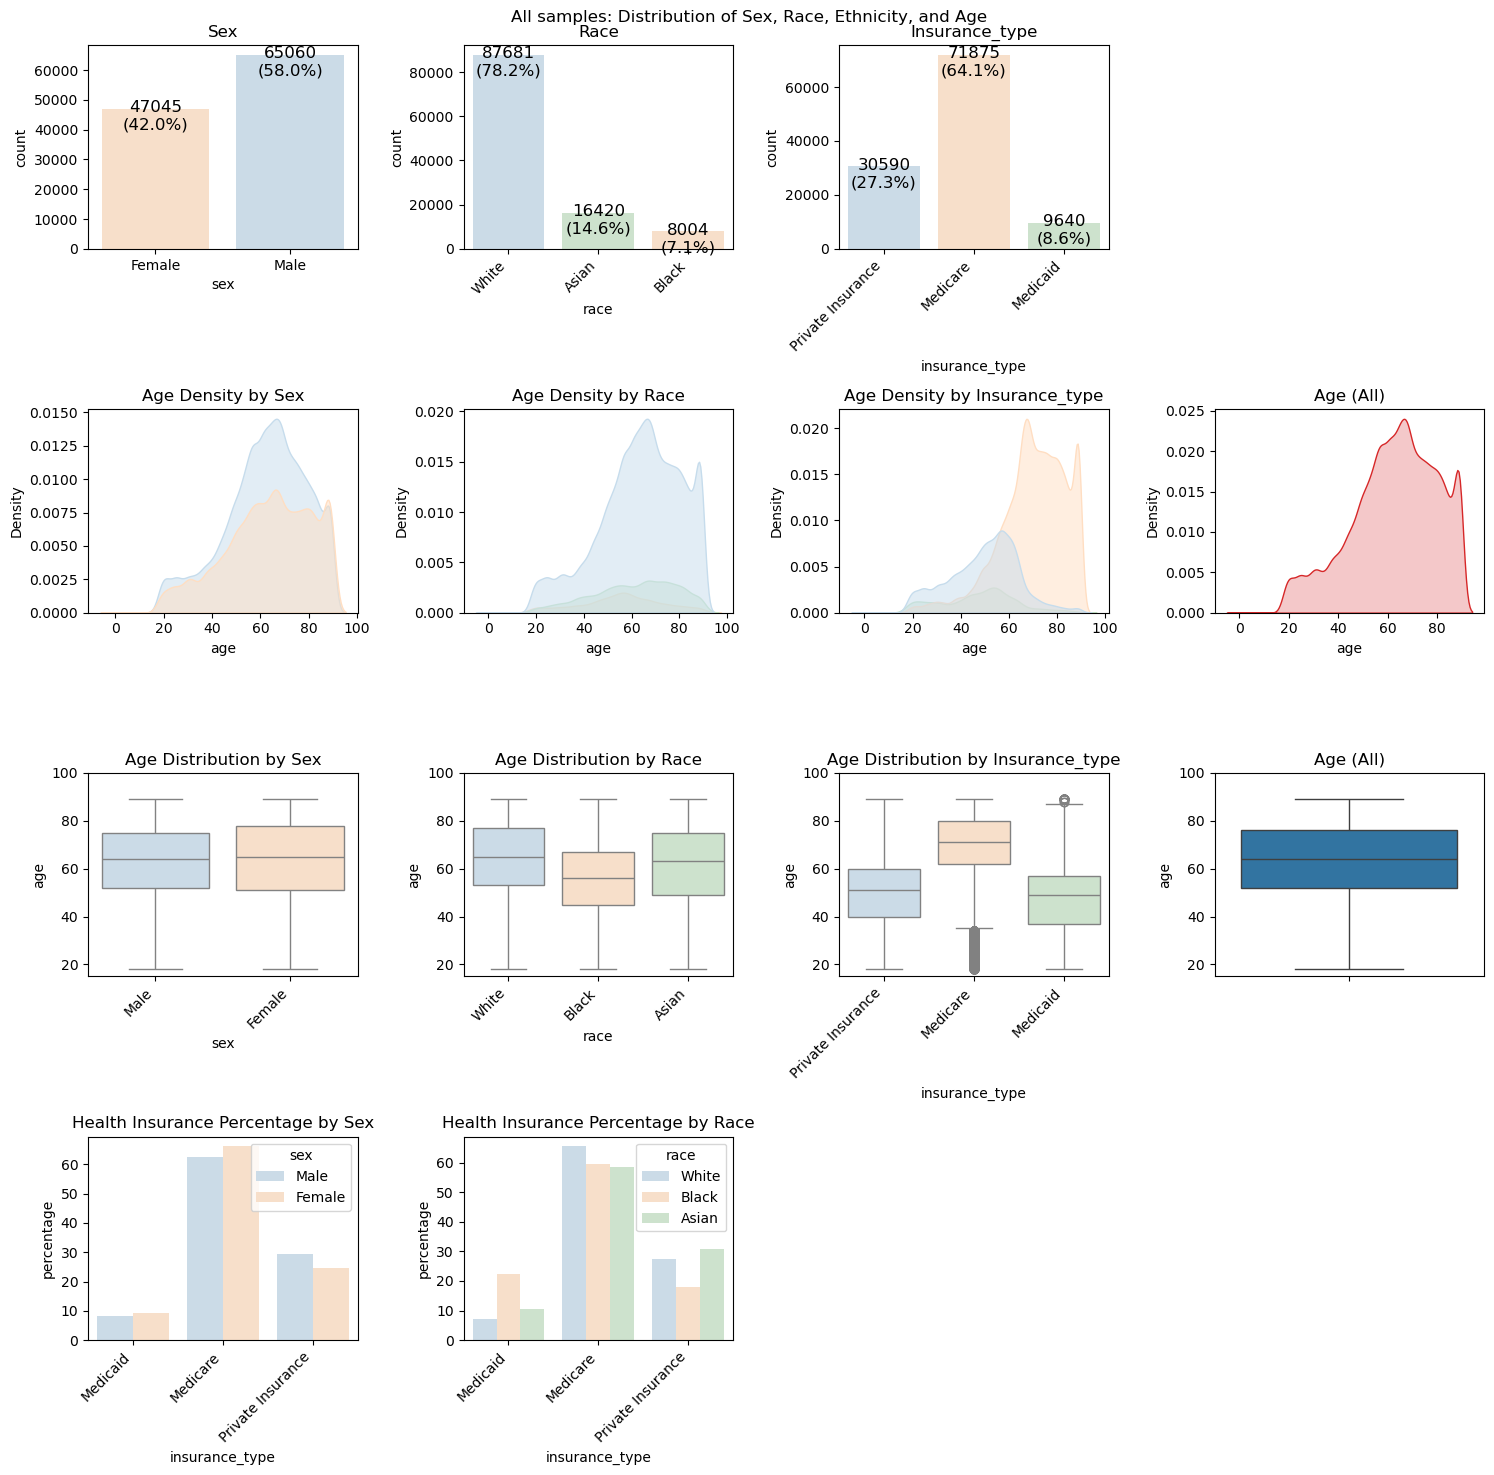

In [9]:
def plot_data_distribution(df, title='Data Distribution'):
    colors = get_colors(3)
    color_maps = {
        'sex': {'Male': colors[0], 'Female': colors[1]},
        'race': {'White': colors[0], 'Black': colors[1], 'Asian': colors[2]},
        'insurance_type': {'Private Insurance': colors[0], 'Medicare': colors[1], 'Medicaid': colors[2]}
    }

    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    fig.suptitle(title)

    # Categorical plots
    plot_categorical(df, 'sex', axes[0, 0], color_maps['sex'], df['sex'].value_counts().sum())
    plot_categorical(df, 'race', axes[0, 1], color_maps['race'], df['race'].value_counts().sum(), rotation=45)
    plot_categorical(df, 'insurance_type', axes[0, 2], color_maps['insurance_type'], df['insurance_type'].value_counts().sum(), rotation=45)
    axes[0, 3].axis('off')

    # Age distribution plots
    plot_age_distribution(df, axes[1, 3])
    plot_age_distribution(df, axes[1, 0], hue='sex', palette=color_maps['sex'])
    plot_age_distribution(df, axes[1, 1], hue='race', palette=color_maps['race'])
    plot_age_distribution(df, axes[1, 2], hue='insurance_type', palette=color_maps['insurance_type'])

    # Age boxplots
    plot_age_boxplot(df, axes[2, 3])
    plot_age_boxplot(df, axes[2, 0], x='sex', hue='sex', palette=color_maps['sex'], order=['Male', 'Female'])
    plot_age_boxplot(df, axes[2, 1], x='race', hue='race', palette=color_maps['race'], order=['White', 'Black', 'Asian'])
    plot_age_boxplot(df, axes[2, 2], x='insurance_type', hue='insurance_type', palette=color_maps['insurance_type'])

    # Insurance percentage plots
    plot_insurance_percentage(df, axes[3, 0], 'sex', hue_order=['Male', 'Female'], palette=color_maps['sex'])
    plot_insurance_percentage(df, axes[3, 1], 'race', hue_order=['White', 'Black', 'Asian'], palette=color_maps['race'])

    axes[3, 2].axis('off')
    axes[3, 3].axis('off')

    plt.tight_layout()
    plt.show()

plot_data_distribution(df, title='All samples: Distribution of Sex, Race, Ethnicity, and Age')


In [6]:
df.describe(include='all')

path_to_image  \
count                                        112105   
unique                                       112105   
top     train/patient42142/study5/view1_frontal.jpg   
freq                                              1   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   

                                        path_to_dcm frontal_lateral   ap_pa  \
count                                        112105          112105  112105   
unique                                       112105               1       3   
top     train/patient42142/study5/view1_frontal.dcm         Frontal      AP   
freq                                              1          112105   93533   
mean                                            NaN             NaN     NaN   
std                                             NaN             NaN     NaN   
min                                             NaN             NaN     NaN   
25%                                             NaN             NaN     NaN   
50%                                             NaN             NaN     NaN   
75%                                             NaN             NaN     NaN   
max                                             NaN             NaN     NaN   

       deid_patient_id  patient_report_date_order  \
count           112105              112105.000000   
unique           39417                        NaN   
top       patient33155                        NaN   
freq                91                        NaN   
mean               NaN                   5.086383   
std                NaN                   6.933803   
min                NaN                   1.000000   
25%                NaN                   1.000000   
50%                NaN                   3.000000   
75%                NaN                   6.000000   
max                NaN                  92.000000   

                                                   report section_narrative  \
count                                              112105            112086   
unique                                             112105            103614   
top     NARRATIVE:\nChest 1 View, 8-8-2005\n \nHISTORY...                \n   
freq                                                    1              2314   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

                   section_clinical_history  \
count                                 71769   
unique                                57431   
top      Critical  care follow-up(ICU)\n \n   
freq                                    180   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

                            section_history  ...    Lung Lesion  \
count                                 20060  ...  112105.000000   
unique                                17120  ...            NaN   
top      Every morning while intubated\n \n  ...            NaN   
freq     

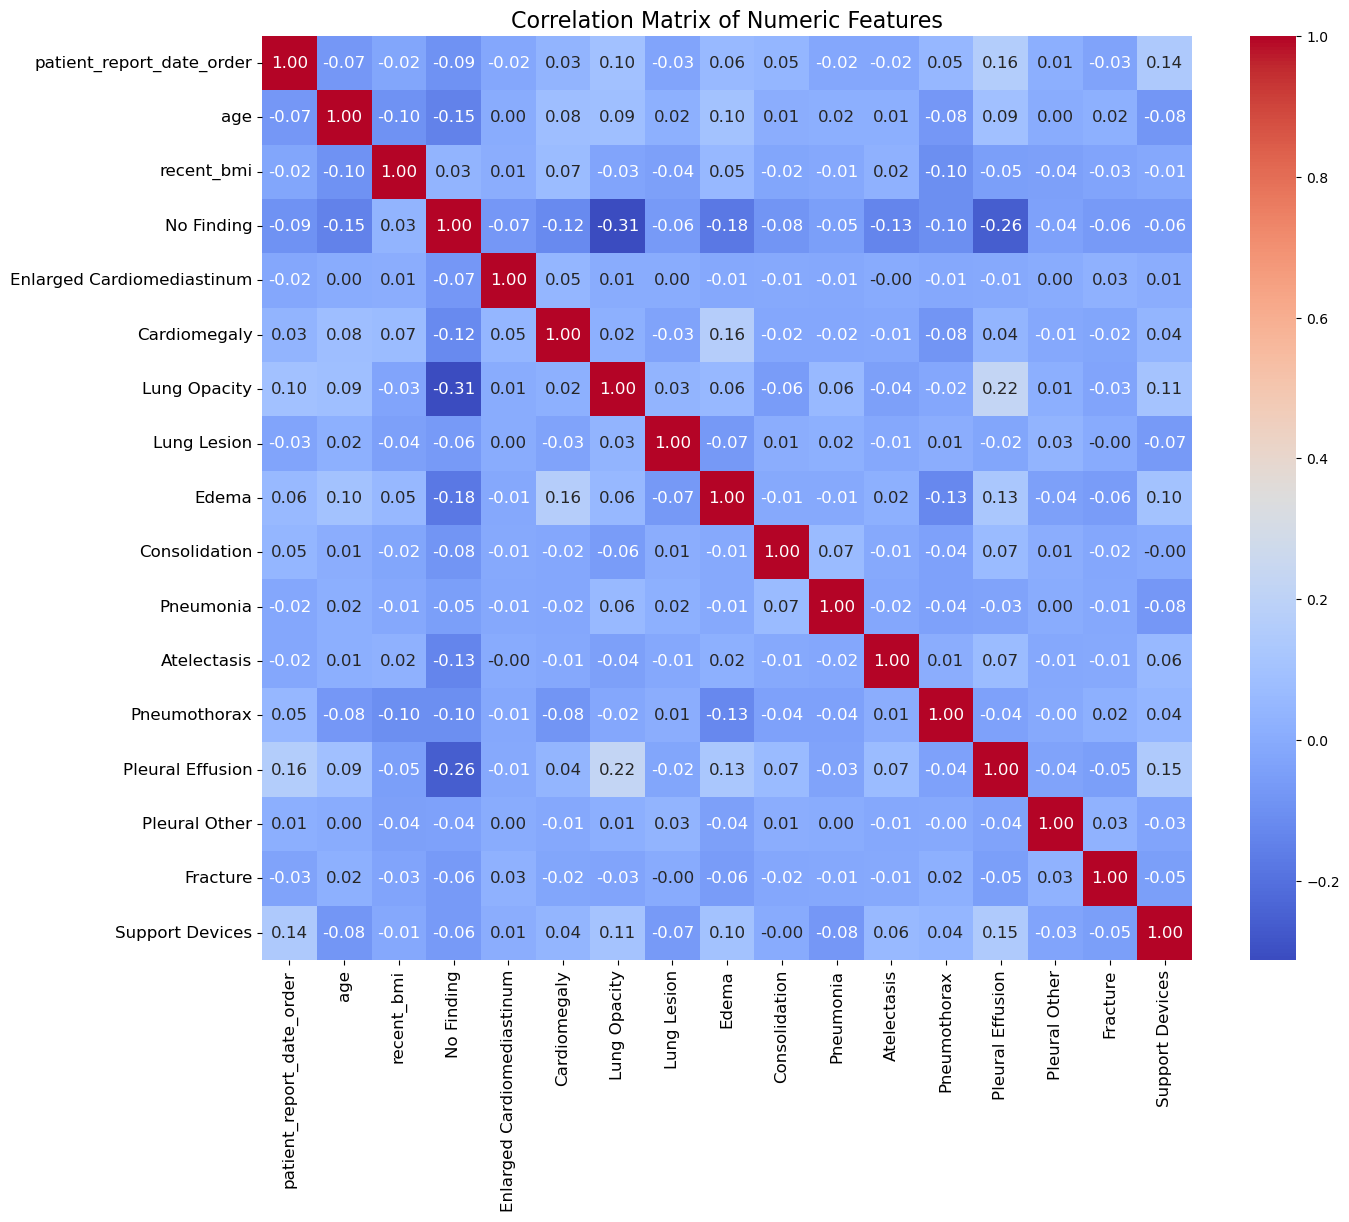

In [10]:
# Wähle nur numerische Spalten aus (ohne Strings wie Pfade oder Kategorische Daten)
numeric_cols = df.select_dtypes(include=[np.number])

# Berechne die Korrelationsmatrix
corr_matrix = numeric_cols.corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(15, 12))  # Größere Abbildungsgröße
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12}, fmt=".2f")  # Größere Schrift für die Zahlen
plt.xticks(fontsize=12)  # Größere Schrift für X-Achsen-Beschriftung
plt.yticks(fontsize=12)  # Größere Schrift für Y-Achsen-Beschriftung
plt.title('Correlation Matrix of Numeric Features', fontsize=16)  # Größere Schrift für den Titel
plt.show()

In [11]:
# split in man and woman
df_cleaned_sex_label_male = df_cleaned_sex_label[df_cleaned_sex_label['sex']==0]
df_cleaned_sex_label_female = df_cleaned_sex_label[df_cleaned_sex_label['sex']==1]

In [12]:
print(f'Anzahl der Männer: {df_cleaned_sex_label_male.shape[0]}')
print(f'Anzahl der Frauen: {df_cleaned_sex_label_female.shape[0]}')

Anzahl der Männer: 112034
Anzahl der Frauen: 78819


In [13]:
disease_columns = ['No Finding', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion',
                   'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                   'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
                   'Fracture', 'Support Devices']




insurance_type  Medicaid  Medicare  Private Insurance
sex                                                  
Female              4356     31117              11572
Male                5284     40758              19018


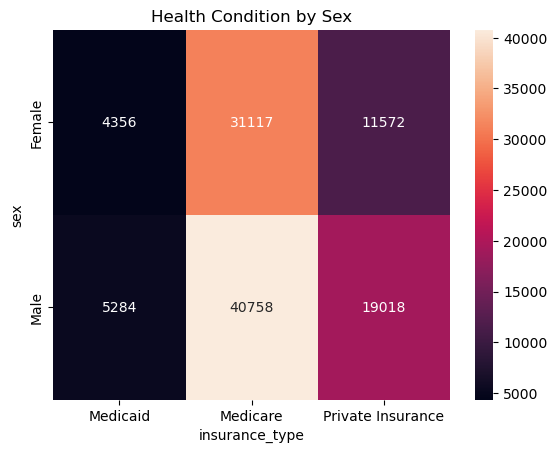

In [14]:
# cross table betwwen sex and insurance type
health_by_sex = pd.crosstab(df['sex'], df['insurance_type'])
print(health_by_sex)

# Heatmap ot the results
sns.heatmap(health_by_sex, annot=True, fmt='d')
plt.title('Health Condition by Sex')
plt.show()

In [15]:
# list of diseases
disease_columns = ['No Finding', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion',
                   'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                   'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
                   'Fracture', 'Support Devices']

filtered_df = df[df[disease_columns].any(axis=1)]

#cross table for sex
disease_by_sex = pd.DataFrame()

for disease in disease_columns:
    # look if the patient has the disease
    disease_count = filtered_df[filtered_df[disease] == 1].groupby('sex').size()
    disease_by_sex[disease] = disease_count

# Nan = 0
disease_by_sex = disease_by_sex.fillna(0).astype(int)

print(disease_by_sex)

        No Finding  Cardiomegaly  Lung Opacity  Lung Lesion  Edema  \
sex                                                                  
Female        4389          5306         23308         1872  11364   
Male          5759          8403         32151         2279  15407   

        Consolidation  Pneumonia  Atelectasis  Pneumothorax  Pleural Effusion  \
sex                                                                             
Female           2994       1167         6915          4555             18582   
Male             4130       1551        10170          6520             25888   

        Pleural Other  Fracture  Support Devices  
sex                                               
Female            592      1641            24344  
Male              994      2843            35697  


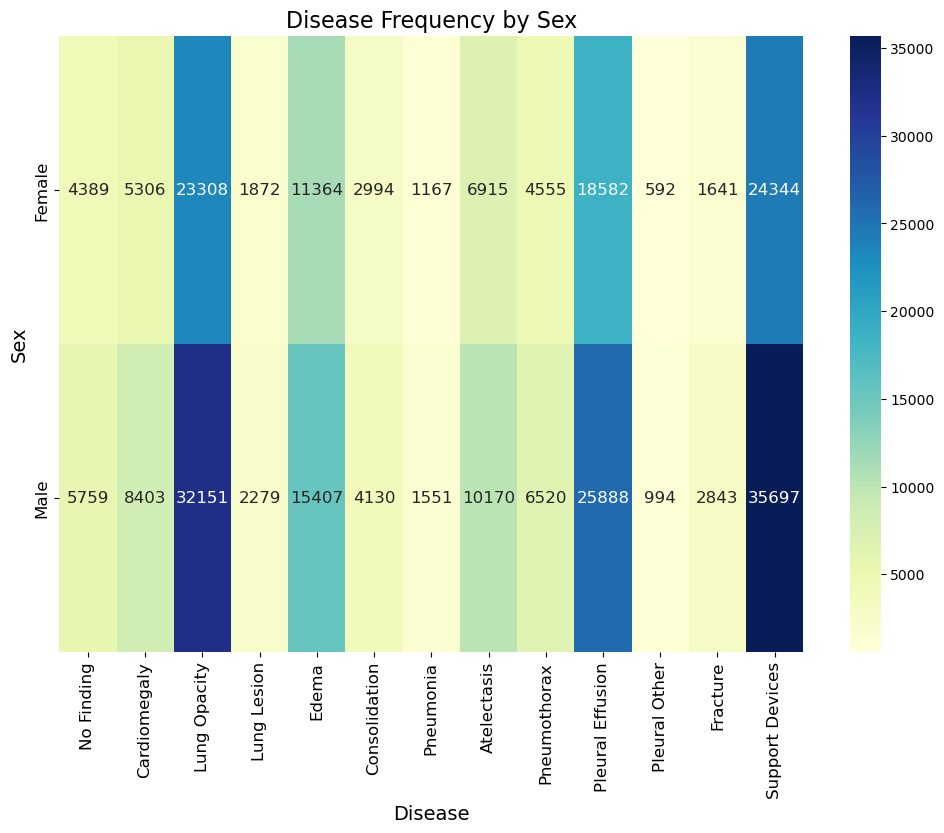

In [16]:
plt.figure(figsize=(12, 8))  
sns.heatmap(disease_by_sex, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            annot_kws={"size": 12})  
plt.title('Disease Frequency by Sex', fontsize=16)  
plt.ylabel('Sex', fontsize=14)  
plt.xlabel('Disease', fontsize=14)  
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

In [17]:
print(df_cleaned_sex_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  190853 non-null  int64 
 1   path_to_image               190853 non-null  object
 2   path_to_dcm                 190853 non-null  object
 3   sex                         190853 non-null  int64 
 4   No Finding                  190853 non-null  int64 
 5   Enlarged Cardiomediastinum  190853 non-null  int64 
 6   Cardiomegaly                190853 non-null  int64 
 7   Lung Opacity                190853 non-null  int64 
 8   Lung Lesion                 190853 non-null  int64 
 9   Edema                       190853 non-null  int64 
 10  Consolidation               190853 non-null  int64 
 11  Pneumonia                   190853 non-null  int64 
 12  Atelectasis                 190853 non-null  int64 
 13  Pneumothorax                1

In [18]:
# Laden der Daten
df_cleaned_sex_label = pd.read_csv("final_data/chexpert_plus_240401_cleaned_label_sex.csv")

# Umwandeln der Geschlechtsspalte in den String-Datentyp
df_cleaned_sex_label['sex'] = df_cleaned_sex_label['sex'].astype(str).str.lower()

# Auswahl der relevanten Spalten von 'Enlarged Cardiomediastinum' bis 'Support Devices'
relevant_columns = df_cleaned_sex_label.loc[:, 'Enlarged Cardiomediastinum':'Support Devices']

# Gruppieren nach Geschlecht und Summieren der Krankheitslabels
disease_counts = df_cleaned_sex_label.groupby('sex')[relevant_columns.columns].sum()

# Anzeigen der Ergebnisse
print(disease_counts)

     Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  Lung Lesion  \
sex                                                                        
0                          5790         14270         55305         4005   
1                          3482          9136         38861         3029   

     Edema  Consolidation  Pneumonia  Atelectasis  Pneumothorax  \
sex                                                               
0    28587           7595       2726        17867         10728   
1    21049           5404       1950        11864          6931   

     Pleural Effusion  Pleural Other  Fracture  Support Devices  
sex                                                              
0               44903           1565      4818            64012  
1               31928            936      2597            43072  


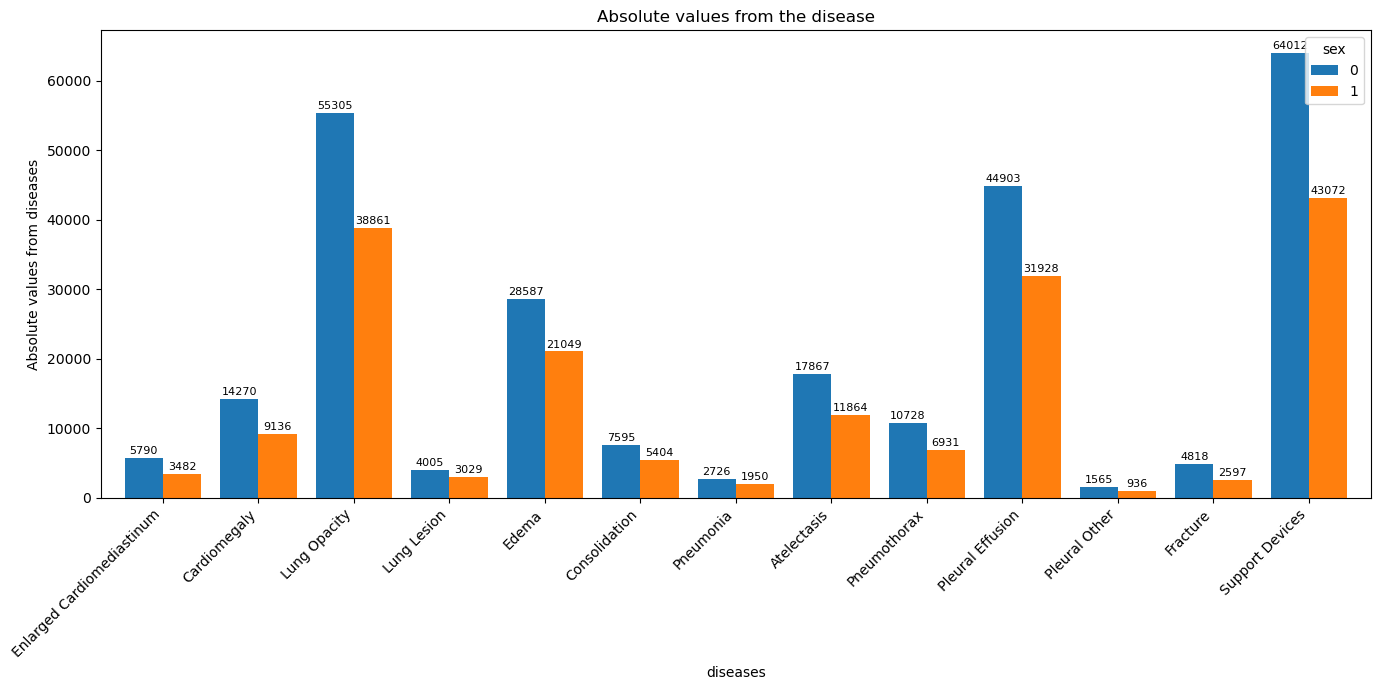

In [19]:


# change in string data
df_cleaned_sex_label['sex'] = df_cleaned_sex_label['sex'].astype(str).str.lower()

# relevant columns 'Enlarged Cardiomediastinum' to 'Support Devices'
relevant_columns = df_cleaned_sex_label.loc[:, 'Enlarged Cardiomediastinum':'Support Devices']

#group by sex and sum by disease
disease_counts = df_cleaned_sex_label.groupby('sex')[relevant_columns.columns].sum()

# Plot
ax = disease_counts.T.plot(kind='bar', figsize=(14, 7), width=0.8)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=8)


plt.title('Absolute values from the disease')
plt.xlabel('diseases')
plt.ylabel('Absolute values from diseases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='sex', loc='upper right')
plt.tight_layout()
plt.show()


In [20]:
df.columns

Index(['path_to_image', 'path_to_dcm', 'frontal_lateral', 'ap_pa',
       'deid_patient_id', 'patient_report_date_order', 'report',
       'section_narrative', 'section_clinical_history', 'section_history',
       'section_comparison', 'section_technique', 'section_procedure_comments',
       'section_findings', 'section_impression', 'section_end_of_impression',
       'section_summary', 'section_accession_number', 'age', 'sex', 'race',
       'ethnicity', 'interpreter_needed', 'insurance_type', 'recent_bmi',
       'deceased', 'split', 'No Finding', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'],
      dtype='object')

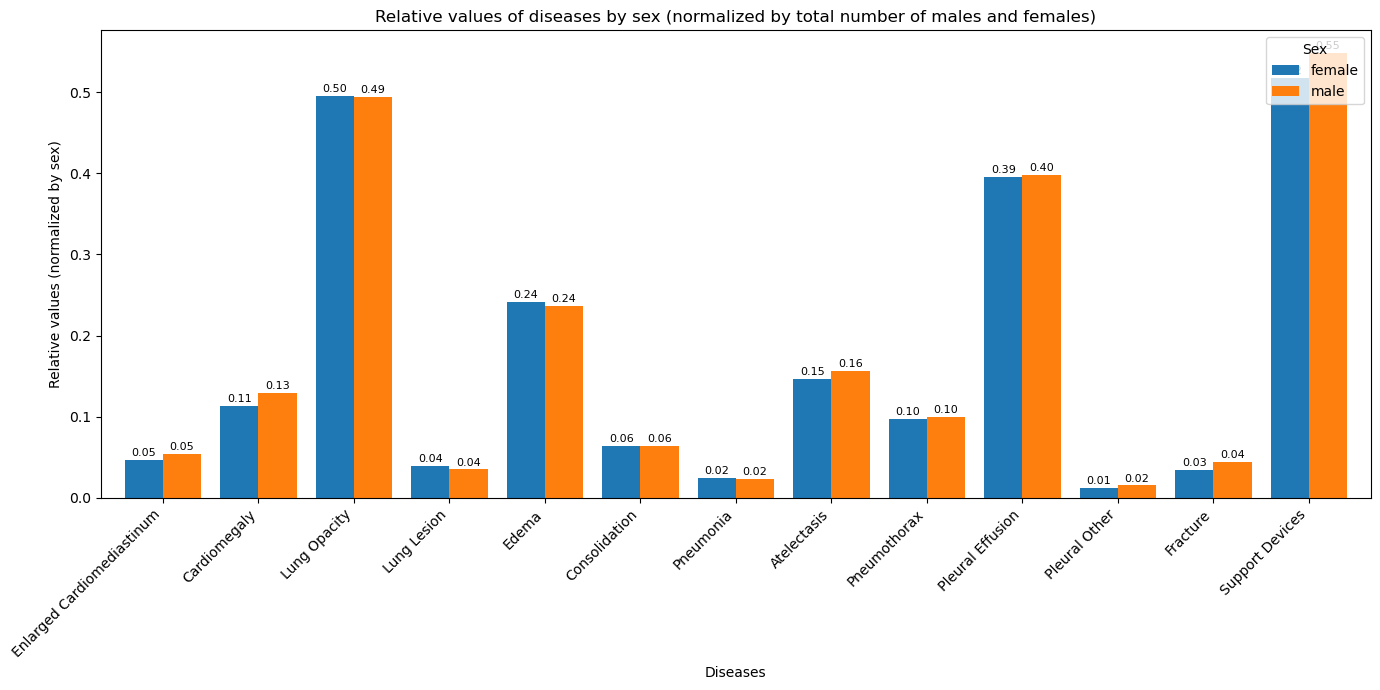

In [21]:
# change in string data
df['sex'] = df['sex'].astype(str).str.lower()

# relevant columns 'Enlarged Cardiomediastinum' to 'Support Devices'
relevant_columns = df.loc[:, 'Enlarged Cardiomediastinum':'Support Devices']

#group by sex and sum by disease
disease_counts = df.groupby('sex')[relevant_columns.columns].sum()

sex_counts = df['sex'].value_counts()
# Normalize disease counts by the total number of males and females
normalized_disease_counts = disease_counts.div(sex_counts, axis=0)


ax = normalized_disease_counts.T.plot(kind='bar', figsize=(14, 7), width=0.8)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Labels and title
plt.title('Relative values of diseases by sex (normalized by total number of males and females)')
plt.xlabel('Diseases')
plt.ylabel('Relative values (normalized by sex)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()

plt.show()

In [22]:
print(df_labeled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112105 entries, 0 to 112104
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  112105 non-null  int64  
 1   path_to_image               112105 non-null  object 
 2   path_to_dcm                 112105 non-null  object 
 3   age                         112105 non-null  float64
 4   sex                         112105 non-null  int64  
 5   race                        112105 non-null  int64  
 6   insurance_type              112105 non-null  int64  
 7   No Finding                  112105 non-null  int64  
 8   Enlarged Cardiomediastinum  112105 non-null  int64  
 9   Cardiomegaly                112105 non-null  int64  
 10  Lung Opacity                112105 non-null  int64  
 11  Lung Lesion                 112105 non-null  int64  
 12  Edema                       112105 non-null  int64  
 13  Consolidation 

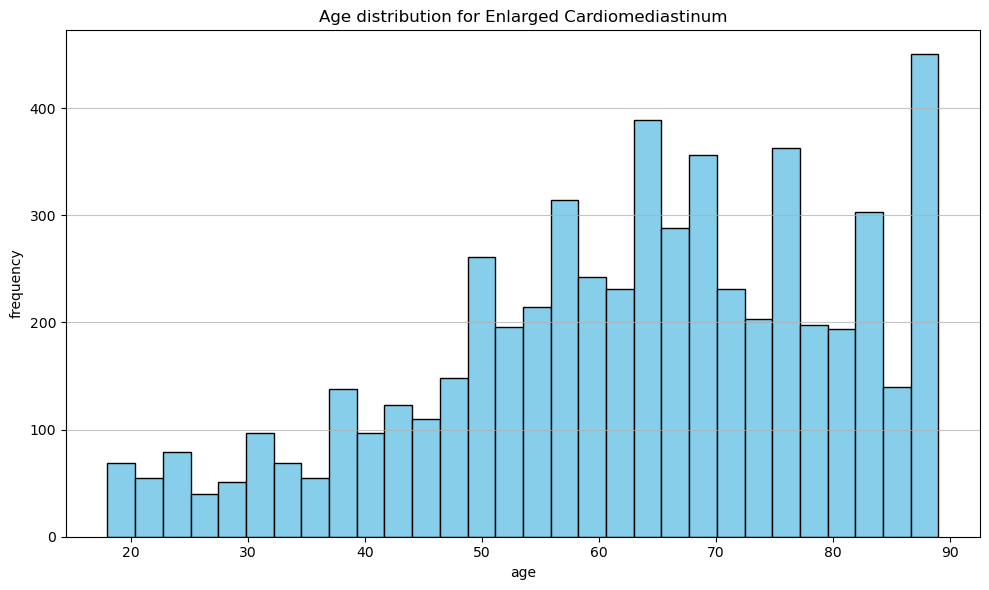

In [23]:
# Laden der Daten


# Filter the Data for Patients with 'Enlarged Cardiomediastinum'
filtered_data = df_labeled[df_labeled ['Enlarged Cardiomediastinum'] == 1]

# Histogramm der Altersverteilung erstellen
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')

plt.title('Age distribution for Enlarged Cardiomediastinum')
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()

# Anzeigen des Plots
plt.show()

In [24]:
df.columns

Index(['path_to_image', 'path_to_dcm', 'frontal_lateral', 'ap_pa',
       'deid_patient_id', 'patient_report_date_order', 'report',
       'section_narrative', 'section_clinical_history', 'section_history',
       'section_comparison', 'section_technique', 'section_procedure_comments',
       'section_findings', 'section_impression', 'section_end_of_impression',
       'section_summary', 'section_accession_number', 'age', 'sex', 'race',
       'ethnicity', 'interpreter_needed', 'insurance_type', 'recent_bmi',
       'deceased', 'split', 'No Finding', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'],
      dtype='object')

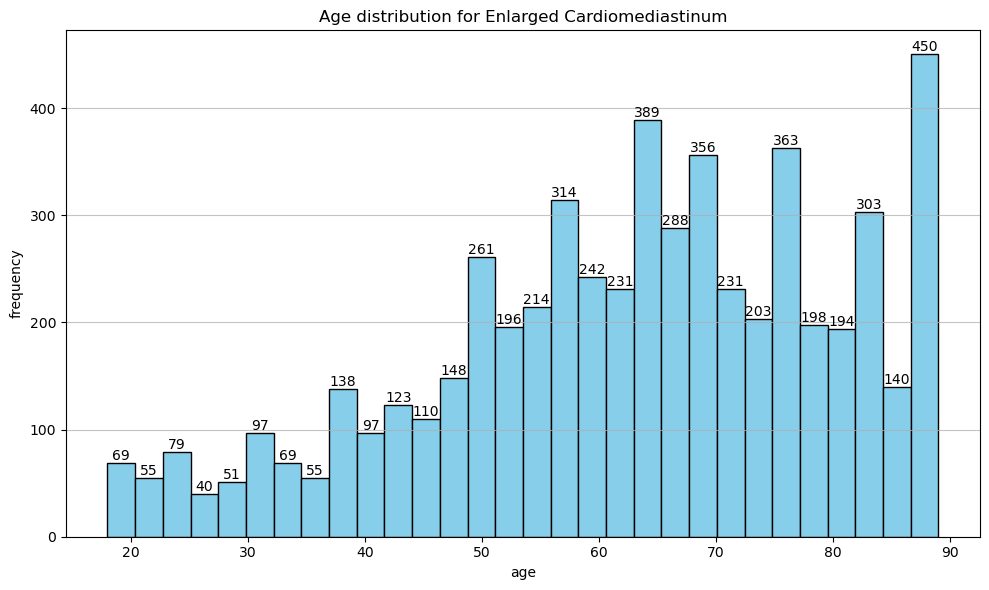

In [28]:
# Laden der Daten

# Filter the Data for Patients with 'Enlarged Cardiomediastinum'
filtered_data = df[df['Enlarged Cardiomediastinum'] == 1]

# Histogramm der Altersverteilung erstellen
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Add age values (frequencies) on top of the bars
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], f'{int(n[i])}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Age distribution for Enlarged Cardiomediastinum')
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()

# Anzeigen des Plots
plt.show()


In [29]:
import plotly.express as px

In [30]:
df.columns = df.columns.str.replace(" ", "_")
diseases = ['Enlarged_Cardiomediastinum','Cardiomegaly', 'Lung_Opacity', 'Lung_Lesion', 'Edema', 'Consolidation','Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural_Effusion','Pleural_Other', 'Fracture']
avg_by_insurance = df.groupby("insurance_type", as_index=False)[diseases].mean()
avg_by_insurance = avg_by_insurance.melt(id_vars = ["insurance_type"], var_name = "disease_type", value_name="average_sickness_rate")
fig = px.bar(avg_by_insurance, color="insurance_type", x="disease_type", y="average_sickness_rate", barmode="group", text="average_sickness_rate")

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') 

fig.show()

In [31]:
avg_by_sex = df.groupby("sex", as_index=False)[diseases].mean()
avg_by_sex = avg_by_sex.melt(id_vars = ["sex"], var_name = "disease_type", value_name="average_sickness_rate")
px.bar(avg_by_sex, color="sex", x="disease_type", y="average_sickness_rate", barmode="group")


In [32]:
import pandas as pd
import plotly.express as px

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")

# List of diseases
diseases = [
    'Enlarged_Cardiomediastinum', 'Cardiomegaly', 'Lung_Opacity', 
    'Lung_Lesion', 'Edema', 'Consolidation', 'Pneumonia', 
    'Atelectasis', 'Pneumothorax', 'Pleural_Effusion', 'Pleural_Other', 
    'Fracture'
]

# Calculate average sickness rates by insurance type
avg_by_insurance = df.groupby("insurance_type", as_index=False)[diseases].mean()

# Melt the DataFrame for easier plotting
avg_by_insurance = avg_by_insurance.melt(id_vars=["insurance_type"], var_name="disease_type", value_name="average_sickness_rate")

# Create a bar plot with values on top of the bars
fig = px.bar(
    avg_by_insurance, 
    color="insurance_type", 
    x="disease_type", 
    y="average_sickness_rate", 
    barmode="group",
    text="average_sickness_rate"  # Show values on the bars
)

# Update the layout and text positioning
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Display values with two decimal places

# Update layout for better display
fig.update_layout(
    title='Average Sickness Rate by Insurance Type and Disease',
    xaxis_title='Disease Type',
    yaxis_title='Average Sickness Rate',
    legend_title='Insurance Type'
)

# Show the plot
fig.show()

In [33]:
avg_by_race = df.groupby("race", as_index=False)[diseases].mean()
avg_by_race = avg_by_race.melt(id_vars = ["race"], var_name = "disease_type", value_name="average_sickness_rate")
px.bar(avg_by_race, color="race", x="disease_type", y="average_sickness_rate", barmode="group")


In [34]:
px.violin(df, y="age", color="race", box=True, x="insurance_type", facet_row="sex")

In [35]:
px.violin(df, y="age", color="race", box=True, x="sex")

In [99]:
from statsmodels.formula.api import logit

In [100]:
diseases

['Enlarged_Cardiomediastinum',
 'Cardiomegaly',
 'Lung_Opacity',
 'Lung_Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Effusion',
 'Pleural_Other',
 'Fracture']

In [42]:
models = {}
df[diseases]

for disease in diseases: 
    models[disease] = logit(data=df, formula=f"{disease} ~ C(sex) + C(insurance_type) + age").fit()
    

Optimization terminated successfully.
         Current function value: 0.200972
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.367287
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689153
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.158101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.544196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.236585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.113962
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.426604
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.318757
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.667252
  

In [43]:
models["Edema"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Edema   No. Observations:               112105
Model:                          Logit   Df Residuals:                   112100
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                 0.01001
Time:                        18:32:09   Log-Likelihood:                -61007.
converged:                       True   LL-Null:                       -61624.
Covariance Type:            nonrobust   LLR p-value:                9.799e-266
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.8351      0.036    -50.718      0.000      -1.906      -1.764
C(sex)[T.male]                            -0.0060      0.014     -0.419      0.676      -0.034       0.022
C(insurance_type)[T.Medicare]             -0.1025      0.028     -3.631      0.000      -0.158      -0.047
C(insurance_type)[T.Private Insurance]    -0.2529      0.028     -8.886      0.000      -0.309      -0.197
age                                        0.0128      0.001     24.611      0.000       0.012       0.014
==========================================================================================================
"""

In [44]:
logit(data=df, formula=f"Edema ~ C(sex) + C(insurance_type) + age")